<h2><b>Proyek Akhir Dicoding - Analisis Data dengan Python</b></h2>
<li>Nama : Muhammad Adnan Bayu Firdaus</li>
<li>Bangkit Study Group : ML-56</li>
<li>Asal Universitas : Universitas Airlangga</li>
<li>Email : adnanbayu.firdaus@gmail.com</li>

<h3>Business Questions</h3>
<li>What season is the favorite season for people rental a bike?</li>
<li>What weather is the favorite for people to rental a bike</li>
<li>How is the rent bike trend in?</li>

<h3>Import Dependencies</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit
import os

<h3>Data Gathering</h3>

In [2]:
#Import Data Day
df_day = pd.read_csv(os.path.join(os.getcwd(),"dataset/day.csv"))
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
#Import Data Hour
df_hour = pd.read_csv(os.path.join(os.getcwd(),"dataset/hour.csv"))
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
#Import Data Readme.txt
wd = os.path.join(os.getcwd(),"dataset/Readme.txt")
with open(wd,"r") as f:
    readme_text = f.read()
print(readme_text)

Bike Sharing Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


Background 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of tra

<h3>Data Assessing</h3>

In [5]:
#Check Missing Value
print("Missing Value Day : {}".format(df_day.isna().any().any()))
print("Missing Value Hour : {}".format(df_hour.isna().any().any()))

Missing Value Day : False
Missing Value Hour : False


There's no missing value or NaN for both data

In [6]:
#Check Duplicate Value
print("Duplicate Value Day : {}".format(df_day.duplicated().any()))
print("Duplicate Value Hour : {}".format(df_hour.duplicated().any()))

Duplicate Value Day : False
Duplicate Value Hour : False


There's no duplicated value for both data

<h3>Exploratory Data Analysis</h3>

In [7]:
#Check Data Type Data Day
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Day data having one object and others numeric

In [8]:
#Check Data Type Data Hour
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Hour data also having one object data type and the other is numeric

In [9]:
#Check the Day Data Details
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


It shows that the maximum rental bike in one day is 8714 and the minimum is 22

In [10]:
#Check the Hour Data Details
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


The table above shows that minimum rental bike in one hour is 1 and the maximum is 977

In [11]:
#Merge Day and Hour dataframe
def merge_df(df_day, df_hour):
  df_day = df_day.copy()
  df_hour = df_hour.copy()

  #manage the collapse column of day and hour dataframe
  day_measure = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
  day_measure_dict = {x:f"{x}_day" for x in day_measure}
  df_day.rename(columns=day_measure_dict, inplace=True)

  drop_measure = [x for x in df_day.columns if x not in day_measure_dict.values()]
  drop_measure.remove('dteday')
  df_day.drop(drop_measure, axis=1, inplace=True)

  df_merge = pd.DataFrame(df_hour.merge(df_day, on="dteday", how="left"))

  return df_merge

In [12]:
df_merge = merge_df(df_day, df_hour)
df_merge

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,casual,registered,cnt,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,3,13,16,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,8,32,40,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,5,27,32,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,3,10,13,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0,1,1,0.344167,0.363625,0.805833,0.160446,331,654,985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,...,11,108,119,0.215833,0.223487,0.577500,0.154846,439,2290,2729
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,...,8,81,89,0.215833,0.223487,0.577500,0.154846,439,2290,2729
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,...,7,83,90,0.215833,0.223487,0.577500,0.154846,439,2290,2729
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,...,13,48,61,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [13]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   instant         17379 non-null  int64  
 1   dteday          17379 non-null  object 
 2   season          17379 non-null  int64  
 3   yr              17379 non-null  int64  
 4   mnth            17379 non-null  int64  
 5   hr              17379 non-null  int64  
 6   holiday         17379 non-null  int64  
 7   weekday         17379 non-null  int64  
 8   workingday      17379 non-null  int64  
 9   weathersit      17379 non-null  int64  
 10  temp            17379 non-null  float64
 11  atemp           17379 non-null  float64
 12  hum             17379 non-null  float64
 13  windspeed       17379 non-null  float64
 14  casual          17379 non-null  int64  
 15  registered      17379 non-null  int64  
 16  cnt             17379 non-null  int64  
 17  temp_day        17379 non-null 

<h3>Explanatory Analysis</h3>

What season is the favorite season for people rental a bike?

In [14]:
def plot_season(df:pd.DataFrame):
    df = df.copy()
    season_1 = df[df['season']==1]
    season_1 = season_1['season'].count()
    season_2 = df[df['season']==2]
    season_2 = season_2.season.count()
    season_3 = df[df['season']==3]
    season_3 = season_3.season.count()
    season_4 = df[df['season']==4]
    season_4 = season_4.season.count()

    label = ["Springer","Summer","Fall","Winter"]
    x = [season_1, season_2, season_3, season_4]

    plt.pie(x=x, labels=label, autopct='%.0f%%', explode=[0,0,0.1,0])

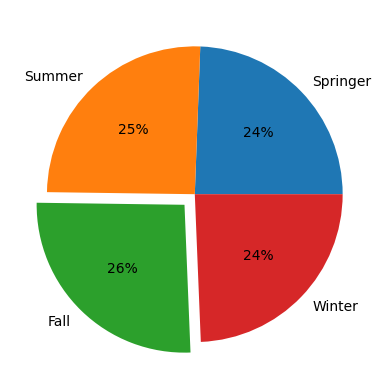

In [15]:
plot_season(df_merge)

Grafik pie diatas menunjukkan musim fall memiliki lebih banyak customer, namun selisihnya sangat sedikit, sehingga musim tidak memiliki pengaruh besar terhadap preferensi pengguna untuk menyewa sepeda.

What weather is the favorite for people to rental a bike?

In [16]:
def plot_weather(df:pd.DataFrame):
    df = df.copy()
    weather1 = df[df['weathersit']==1]
    weather1 = weather1['weathersit'].count()
    weather2 = df[df['weathersit']==2]
    weather2 = weather2['weathersit'].count()
    weather3 = df[df['weathersit']==3]
    weather3 = weather3['weathersit'].count()
    weather4 = df[df['weathersit']==4]
    weather4 = weather4['weathersit'].count()

    label = ["weather 1","weather 2","weather 3","weather 4"]
    x = [weather1, weather2, weather3, weather4]

    plt.pie(x=x, labels=label, autopct='%.0f%%', explode=[0.1,0,0,0])

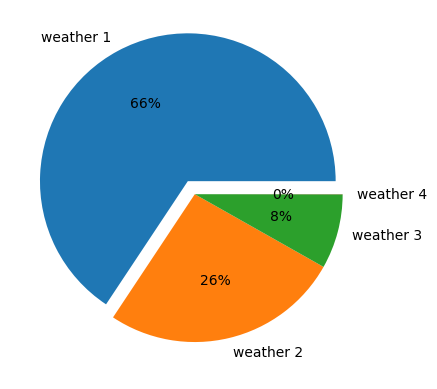

In [17]:
plot_weather(df_merge)

Pie chart tersebut sangat menunjukkan bahwa pengguna dominan merental sepeda ketika cuaca cerah, sedikit awan, sebagian berawan, sementara ketika cuaca hujan deras, es, petir, kabut, salju tidak ada sama sekali yang menyewa sepeda.

In [18]:
def bar_weather(df:pd.DataFrame):
    df = df.copy()
    weather1 = df[df['weathersit']==1]
    weather1 = weather1['weathersit'].count()
    weather2 = df[df['weathersit']==2]
    weather2 = weather2['weathersit'].count()
    weather3 = df[df['weathersit']==3]
    weather3 = weather3['weathersit'].count()
    weather4 = df[df['weathersit']==4]
    weather4 = weather4['weathersit'].count()

    label = ["weather 1","weather 2","weather 3","weather 4"]
    y = [weather1, weather2, weather3, weather4]

    plt.bar(height=y, x=label)

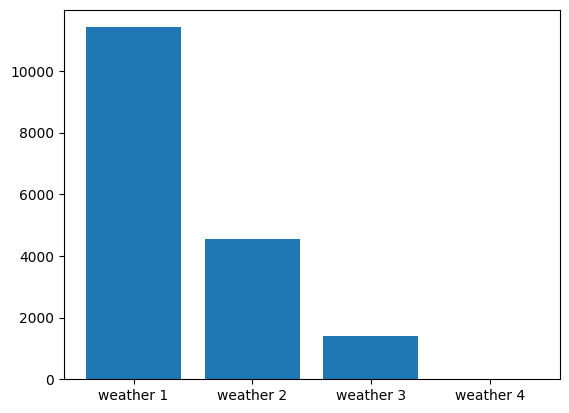

In [19]:
bar_weather(df_merge)

Dari bar plot diatas dapat dilihat terdapat perbedaan yang cukup jauh bagi masing-masing cuaca.

How is the rent bike trend?

In [34]:
def lineChart_bike(df:pd.DataFrame):
    df = df.copy()
    amount = df['cnt_day']
    date = df['dteday']

    plt.figure(figsize=(12, 5)) 
    plt.plot(date, amount)
    plt.xlabel("2011 - 2012")
    plt.ylabel("Count")
    plt.show()

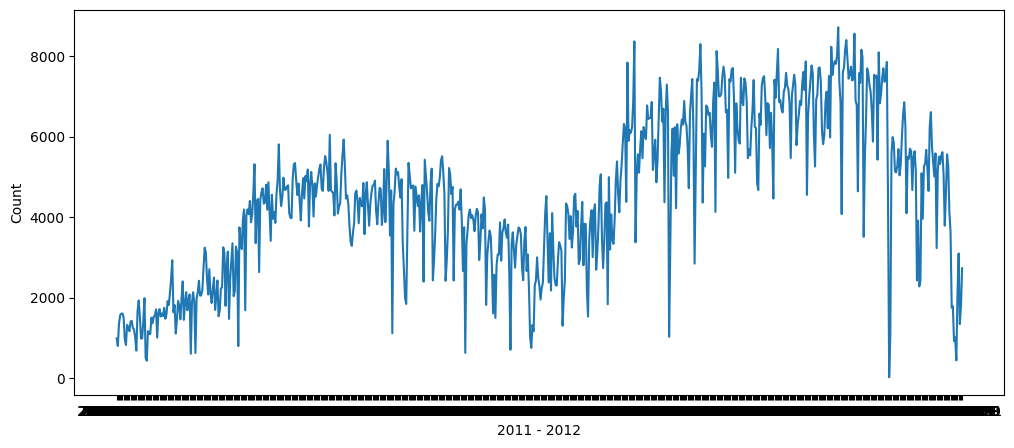

In [35]:
lineChart_bike(df_merge)

Grafik tersebut menunjukkan bahwa jumlah penyewa sepeda cukup fluktuatif dan mengalami penurunan pada akhir 2012.

<h3>Kesimpulan</h3>

Dari hasil analisis data di atas dapat disimpulkan bahwa
- Musim tidak memiliki pengaruh besar dalam minat pengguna dalam menyewa sepeda
- Cuaca memiliki pengaruh yang sangat besar dalam minat pengguna menyewa sepeda, kondisi cuaca yang paling digemari adalah cuaca cerah, sedikit awan, sebagian berawan
- Grafik tersebut menunjukkan bahwa jumlah penyewa sepeda cukup fluktuatif dan mengalami penurunan pada akhir 2012. 